In [1]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.optimize as scp

**1**

In [59]:
x = np.linspace(0, 3, 100000)
def function_1(x):
    return (x**2 - (np.log10(x))**3)
y = function3(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log10



In [60]:
x[np.argmin(y)]

0.35904359043590434

In [61]:
np.min(y)

0.21694601885484358

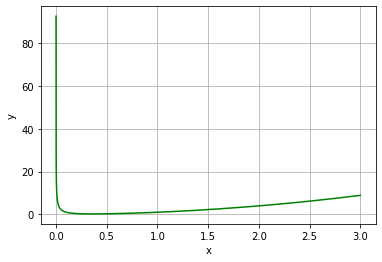

In [62]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "-g")
plt.grid(True)

**2**

In [63]:
scp.minimize_scalar(function_1, bracket=[0, 3], method="Brent", tol=1e-2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log10



     fun: 0.21694712970326785
    nfev: 16
     nit: 12
 success: True
       x: 0.3595769688775239

In [64]:
scp.minimize_scalar(function_1, bracket=[0, 3], method="Golden", tol=1e-2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log10



     fun: 0.21694634256451822
    nfev: 20
     nit: 15
 success: True
       x: 0.3587603997105908

**3**

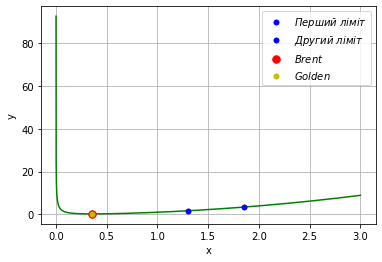

In [70]:
limits = [rd.uniform(0, 3), rd.uniform(0, 3)]
limits.sort()
min_golden = scp.minimize_scalar(function_1, bracket=[limits[0], limits[1]], method="Golden", tol=1e-5)
min_brent = scp.minimize_scalar(function_1, bracket=[limits[0], limits[1]], method="Brent", tol=1e-5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "-g")
plt.plot(limits[0], function_1(limits[0]), ".b", markersize=10, label="$Перший\\ ліміт$")
plt.plot(limits[1], function_1(limits[1]), ".b", markersize=10, label="$Другий\\ ліміт$")
plt.plot(min_brent.x, min_brent.fun, ".r", markersize=15, label="$Brent$")
plt.plot(min_golden.x, min_golden.fun, ".y", markersize=10, label="$Golden$")
plt.legend(loc='upper right')
plt.grid(True)

**4**

In [71]:
min_brent = scp.minimize_scalar(function_1, bracket=[limits[0], limits[1]], method="Brent", tol=1e-5)
min_brent

     fun: 0.21694601882145628
    nfev: 15
     nit: 10
 success: True
       x: 0.3590463514153875

In [72]:
min_golden = scp.minimize_scalar(function_1, bracket=[limits[0], limits[1]], method="Golden", tol=1e-5)
min_golden

     fun: 0.216946018824767
    nfev: 31
     nit: 25
 success: True
       x: 0.35904557333866455

**5**

In [73]:
min_bounded = scp.minimize_scalar(function3, bounds=[0.5, 1], method="Bounded", tol=1e-5)
min_bounded

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning:

Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.



     fun: 0.2772824632311694
 message: 'Solution found.'
    nfev: 24
  status: 0
 success: True
       x: 0.5000044621186849

**6**

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning:

Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.



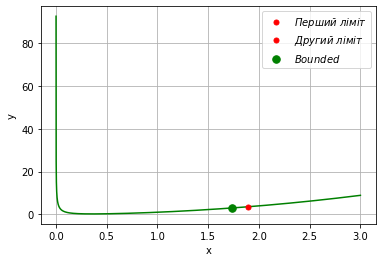

In [77]:
limits_for_bounded = [rd.uniform(0, 3), rd.uniform(0, 3)]
limits_for_bounded.sort()
min_bounded_rand = scp.minimize_scalar(function_1, bounds=[limits_for_bounded[0], limits_for_bounded[1]], method="Bounded", tol=1e-5)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "-g")
plt.plot(limits_for_bounded[0], function_1(limits_for_bounded[0]), ".r", markersize=10, label="$Перший\\ ліміт$")
plt.plot(limits_for_bounded[1], function_1(limits_for_bounded[1]), ".r", markersize=10, label="$Другий\\ ліміт$")
plt.plot(min_bounded_rand.x, min_bounded_rand.fun, ".g", markersize=15, label="$Bounded$")
plt.legend(loc='upper right')
plt.grid(True)

**7**

In [78]:
x_g = np.linspace(-7*np.pi, 7*np.pi, 100000)
def function_g(x_g):
    return (x_g*np.cos(x_g))
y_g = function_g(x_g)

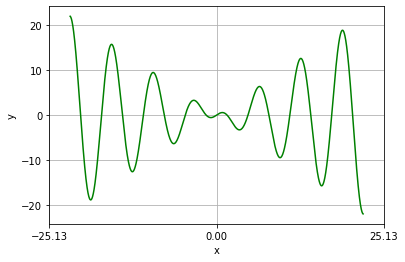

In [79]:
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_g, y_g, "-g")
plt.xticks([-8*np.pi, 0, 8*np.pi])
plt.grid(True)

**8**

In [80]:
def minus_function_g(x_g):
    return -x_g*np.cos(x_g)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning:

Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.



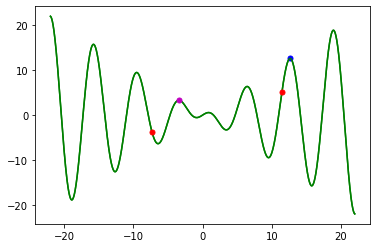

In [85]:
limits_g = [rd.uniform(-7*np.pi, 7*np.pi), rd.uniform(-7*np.pi, 7*np.pi)]
limits_g.sort()
limits_g_array = np.array(limits_g)
max_brent = scp.minimize_scalar(minus_function_g, bracket=limits_g_array, method='Brent', tol=1e-5)
max_bounded = scp.minimize_scalar(minus_function_g, bounds=limits_g_array, method='Bounded', tol=1e-5)
plt.plot(x_g, function_g(x_g), "-g", max_brent.x, -max_brent.fun, ".b", markersize=10) 
plt.plot(x_g, function_g(x_g), "-g", max_bounded.x, -max_bounded.fun, ".m", markersize=10)
plt.plot(limits_g_array[0], function_g(limits_g_array[0]), ".r", markersize=10)
plt.plot(limits_g_array[1], function_g(limits_g_array[1]), ".r", markersize=10)

**9**

In [36]:
def r(x, y):
    return -(y + 47) * np.sin(np.sqrt(abs(x/2 + y + 47))) - x * np.sin(np.sqrt(abs(x - ( y + 47))))
r = np.vectorize(r)

**10**

In [48]:
x_axis = y_axis = np.linspace(-512, 512, 101)
x, y = np.meshgrid(x_axis, y_axis)
z = r(x, y)

**11**

In [86]:
fig = go.Figure(data = go.Surface(x = x_axis, y = y_axis, z = z, colorscale = 'Viridis'))
fig.update_layout(
    width = 450, height = 400,
    margin = dict(l = 0, r = 0, b = 0, t = 15, pad = 0),
    scene = {'aspectratio': {'x': 1, 'y': 1, 'z': 0.5}}
)

**12**

In [87]:
fig = go.Figure(data = go.Contour(x = x_axis, y = y_axis, z = z, colorscale = 'Viridis', contours_coloring = 'heatmap', name = 'r(x, y)'))
fig.update_layout(
    width = 450, height = 400, 
    margin = dict(l = 0, r = 0, b = 0, t = 25, pad = 0), 
    yaxis = dict(scaleanchor = 'x', scaleratio = 1), 
    showlegend = False
    )

**13**

In [52]:
lx = np.array([-512, 512])
b = np.array([lx, lx])
x0 = [-512, 512]
result = scp.minimize(lambda x: r(*x), x0, bounds = b)
result

      fun: array(-565.99778097)
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.27373675e-05, 0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 6
   status: 0
  success: True
        x: array([-105.8767341 ,  423.15320094])